# Base de datos: MyAnimeList 2020 

Este conjunto de datos contiene informacion sobre 17.562 animes y las preferencias de 325.772 usuarios diferentes. En particular, este conjunto de datos contiene: 
- La lista de anime por usuario. Incluye abandonadas, completas, planificadas para ver, actualmente viendo y en espera. 
- Calificaciones dadas por los usuarios a los animes que han visto completos.
- Informacion sobre el anime como genero, estadisticas, estudio, etc. 
- HTML con informacion de anime para realizar desguace de datos. Estos archivos contienen informacion como reseñas, sinopsis, informacion sobre el personal, estadisticas del anime, genero, etc. 


In [1]:
# Importamos las librerias que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

# Exploramos el primer set de datos: animelist.csv
Este set de datos contiene una lista de todos los animes registrados por el usuario con la puntuacion respectiva, estado de visualizacion y numero de episodios vistos.  
Contiene 109 millones de filas, 17.562 animes diferentes y 325.770 usuarios diferentes. 

In [2]:
#Cargamos el dataset animelist.csv
animelist = pd.read_csv(r'C:\Users\ferbi\OneDrive\Desktop\Fer\DATASCIENCE\Cuarto TP Sistemas de recomendacion\archive (10)\animelist.csv')

In [3]:
animelist.head()

,user_id,anime_id,rating,watching_status,watched_episodes
0,0,67,9,1,1
1,0,6702,7,1,4
2,0,242,10,1,4
3,0,4898,0,1,1
4,0,21,10,1,0


ANALISIS EXPLORATORIO DE LOS DATOS (EDA)

In [4]:
print(f'Numero de filas: {animelist.shape[0]}')
print(f'Numero de columnas: {animelist.shape[1]}')

Numero de filas: 109224747
Numero de columnas: 5


In [5]:
animelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109224747 entries, 0 to 109224746
Data columns (total 5 columns):
 #   Column            Dtype
---  ------            -----
 0   user_id           int64
 1   anime_id          int64
 2   rating            int64
 3   watching_status   int64
 4   watched_episodes  int64
dtypes: int64(5)
memory usage: 4.1 GB


In [6]:
#Valores nulos
animelist.isna().sum()

user_id             0
anime_id            0
rating              0
watching_status     0
watched_episodes    0
dtype: int64

INFORMACION DE ATRIBUTOS

1. user_id: Identificador unico de usuarios
2. anime_id: Identificador unico de animes
3. rating: puntuacion recibida 
4. watching_status: estado de visualizacion
5. watched_episodes: numero de episodios vistos

1) ANALISIS DE LA PRIMER VARIABLE: user_id

In [7]:
animelist.user_id.nunique() #Este dataset contiene 325.770 usuarios diferentes

325770

2) ANALISIS DE LA SEGUNDA VARIABLE: anime_id

In [8]:
animelist.anime_id.nunique() #Este dataset contiene 17.562 animes diferentes

17562

3) ANALISIS DE LA TERCER VARIABLE: rating

In [9]:
animelist.rating.nunique() 

11

In [10]:
animelist.rating.unique() #Las puntuaciones van desde el 0 hasta el 10

array([ 9,  7, 10,  0,  8,  6,  5,  4,  3,  2,  1], dtype=int64)

In [11]:
#Veamos como se distribuyen estas calificaciones
animelist.rating.describe()

count    1.092247e+08
mean     4.245717e+00
std      3.912888e+00
min      0.000000e+00
25%      0.000000e+00
50%      5.000000e+00
75%      8.000000e+00
max      1.000000e+01
Name: rating, dtype: float64

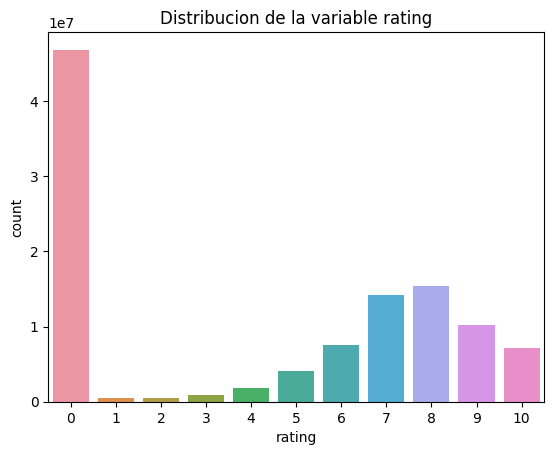

In [12]:
#Graficamos la distribucion de la variable rating
fig = plt.figure()
ax = plt.axes()
ax= sns.countplot(x='rating', data=animelist, order=range(0, 11))
plt.title('Distribucion de la variable rating')
plt.show()

Las puntuaciones se encuentran en el rango del 1 al 10. El 0 corresponde a puntuaciones NO asignadas por los usuarios. Veamos entonces las distribucion de puntuaciones sin el valor 0

In [13]:
mask = animelist.rating !=0  
animelist_sincero = animelist[mask]

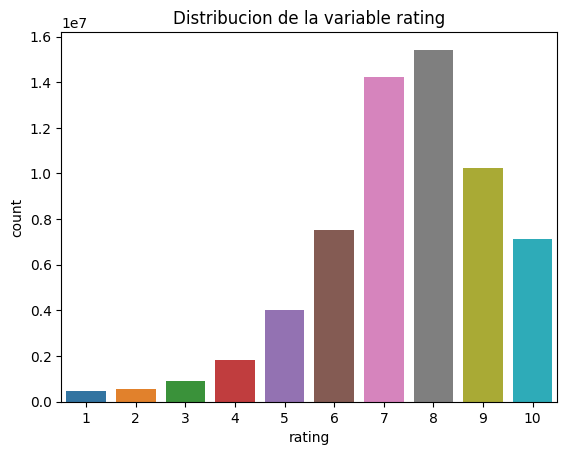

In [14]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='rating', data=animelist_sincero, order=range(1, 11))
plt.title('Distribucion de la variable rating')
plt.show()

Vemos que la puntuacion que mas se repite es el 8, seguida por el 7, el 9, el 10 y el 6

4) ANALISIS DE LA CUARTA VARIABLE: watching_status

In [15]:
animelist.watching_status.nunique()

9

In [16]:
animelist.watching_status.unique()

array([ 1,  2,  3,  4,  6,  0,  5, 33, 55], dtype=int64)

Observamos que esta variable adopta los valores 0, 1, 2, 3, 4, 5, 6, 33 y 55. Obtendremos mas informacion sobre el significado de estos valores al analizar el dataset correspondiente: watching_status.csv

5) ANALISIS DE LA QUINTA VARIABLE: watched_episodes

In [17]:
animelist.watched_episodes.nunique() #Esta variable adopta 1464 valroes diferentes,
#correspondientes al numero de episodios vistos

1464

In [18]:
animelist.watched_episodes.unique()

array([   1,    4,    0, ..., 1266, 1039, 6688], dtype=int64)

In [19]:
#Eliminemos el cero para ver la distribucion de esta variable
mask = animelist.watched_episodes !=0
animelist_sincero = animelist[mask]

C:\Users\ferbi\AppData\Local\Temp\ipykernel_14308\1834424479.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x= animelist_sincero.watched_episodes)


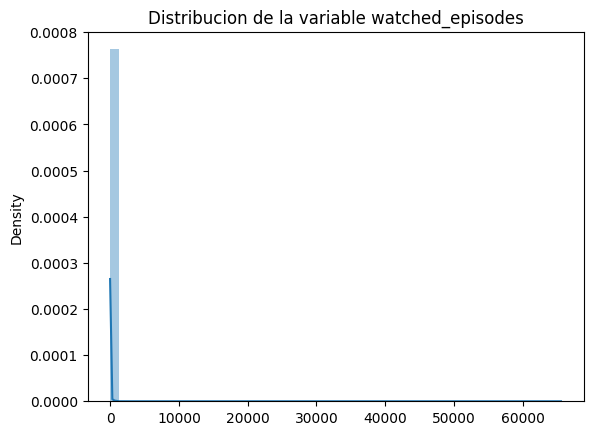

In [20]:
#Veamos la distribucion de esta variable numerica continua
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x= animelist_sincero.watched_episodes)
plt.title('Distribucion de la variable watched_episodes')
plt.show()

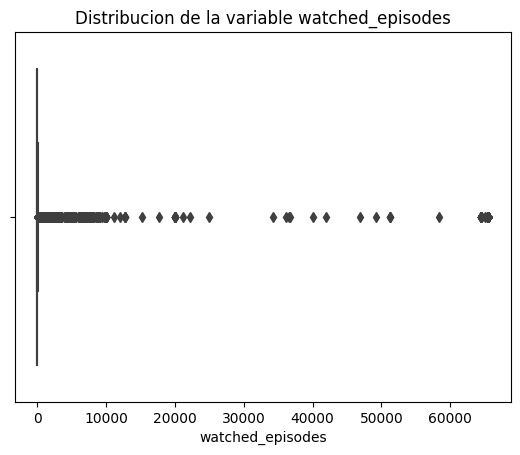

In [21]:
fig = plt.figure()
ax = plt.axes()
ax = sns.boxplot(x= animelist_sincero.watched_episodes)
plt.title('Distribucion de la variable watched_episodes')
plt.show()

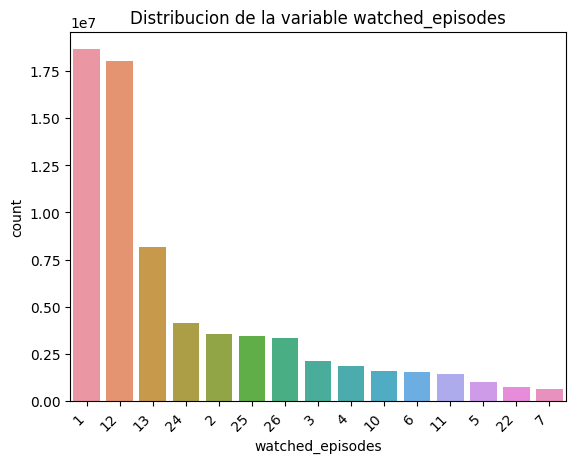

In [22]:
fig = plt.figure()
ax = plt.axes()
ax= sns.countplot(x='watched_episodes', data=animelist_sincero, order=animelist_sincero.watched_episodes.value_counts().index[:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Distribucion de la variable watched_episodes')
plt.show()

Las cantidades de episodios mas vistos son 1, 12, 13, 24... 

# Exploramos el segundo set de datos: watching_status.csv
Describe todos los estados posibles de la columna watching_status en animelist.csv


In [23]:
watching_status = pd.read_csv(r"C:\Users\ferbi\OneDrive\Desktop\Fer\DATASCIENCE\Cuarto TP Sistemas de recomendacion\archive (10)\watching_status.csv")

In [24]:
watching_status.head()

,status,description
0,1,Currently Watching
1,2,Completed
2,3,On Hold
3,4,Dropped
4,6,Plan to Watch


In [25]:
print(f'Numero de filas: {watching_status.shape[0]}')
print(f'Numero de columnas: {watching_status.shape[1]}')

Numero de filas: 5
Numero de columnas: 2


Vemos que este dataset es simplemente una tabla que contiene informacion sobre el "estado de visualizacion" de los animes, donde:
- 1: Viendo actualmente = Currently watching
- 2: Completado = completed
- 3: En lista de espera = On Hold
- 4: Abandonada = Dropped
- 5: Planificado para ver = Plan to Watch

# Exploramos el tercer set de datos: rating_complete.csv 

Este dataset es un subconjunto de animelist.csv. El mismo, solo considera los animes que el usuario ha visto por completo (watchin_status = 2), y le ha otorgado una puntacion distinta de cero.  
Contiene 57 millones de calificaciones aplicadas a 16.872 animes por 310.059 usuarios. 

In [26]:
rating_complete = pd.read_csv(r"C:\Users\ferbi\OneDrive\Desktop\Fer\DATASCIENCE\Cuarto TP Sistemas de recomendacion\archive (10)\rating_complete.csv")

In [27]:
rating_complete.head()

,user_id,anime_id,rating
0,0,430,9
1,0,1004,5
2,0,3010,7
3,0,570,7
4,0,2762,9


ANALISIS EXPLORATORIO DE LOS DATOS (EDA)

In [28]:
print(f'Numero de filas: {rating_complete.shape[0]}')
print(f'Numero de columnas: {rating_complete.shape[1]}')

Numero de filas: 57633278
Numero de columnas: 3


In [29]:
rating_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57633278 entries, 0 to 57633277
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 1.3 GB


In [30]:
rating_complete.isna().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

INFORMACION DE ATRIBUTOS
1. user_id: ID de cada usuario.
2. anime_id: ID de cada anime.
3. rating: calificaciones asignadas por los usuarios.

En una primera instancia, podemos concluir en que este es el dataset que utilizaremos para entrenar los modelos de recomendacion ya que contiene la informacion necesaria para hacerlo.

1. ANALISIS DE LA PRIMER VARIABLE: user_id

In [31]:
rating_complete.user_id.nunique() #Contiene 310.059 usuarios diferentes 
#Este valor difiere del encontrado en el dataset animelist.csv (325.770)

310059

2. ANALISIS DE LA SEGUNDA VARIABLE: anime_id

In [32]:
rating_complete.anime_id.nunique() #Contiene 16.872 animes diferentes 
#Este valor difiere del encontrado en el dataset animelist.csv (17.562)

16872

3. ANALISIS DE LA TERCER VARIABLE: rating

In [33]:
rating_complete.rating.nunique()

10

In [34]:
rating_complete.rating.unique() #Vemos que las puntuaciones ya no
#contienen el 0

array([ 9,  5,  7,  8, 10,  6,  4,  3,  2,  1], dtype=int64)

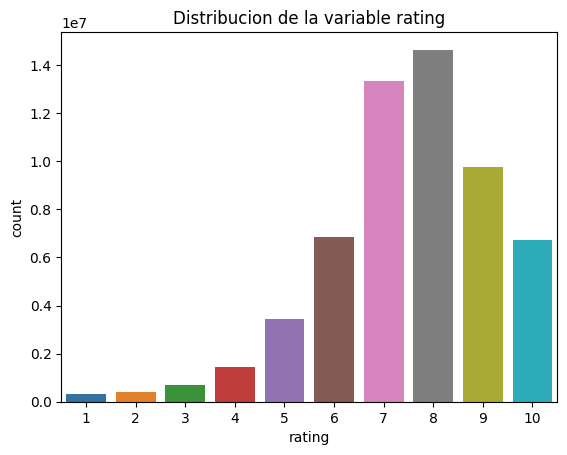

In [35]:
fig = plt.figure()
ax = plt.axes()
ax = sns.countplot(x='rating', data=rating_complete, order=range(1, 11))
plt.title('Distribucion de la variable rating')
plt.show()

Al igual que en el primer Set de datos, vemos que la puntuacion que mas se repite es el 8, seguida por el 7, el 9, el 10 y el 6

# Exploramos el cuarto set de datos: anime.csv 

Este set contiene informacion general de cada anime (17.562 animes diferentes), como genero, estadisticas, estudio, etc.

In [158]:
anime = pd.read_csv(r"C:\Users\ferbi\OneDrive\Desktop\Fer\DATASCIENCE\Cuarto TP Sistemas de recomendacion\archive (10)\anime.csv")

In [159]:
anime.head()

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Cowboy Bebop:The Movie,カウボーイビバップ 天国の扉,Movie,1,"Sep 1, 2001",Unknown,...,30043.0,49201.0,49505.0,22632.0,5805.0,1877.0,577.0,221.0,109.0,379.0
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Trigun,トライガン,TV,26,"Apr 1, 1998 to Sep 30, 1998",Spring 1998,...,50229.0,75651.0,86142.0,49432.0,15376.0,5838.0,1965.0,664.0,316.0,533.0
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Witch Hunter Robin,Witch Hunter ROBIN (ウイッチハンターロビン),TV,26,"Jul 2, 2002 to Dec 24, 2002",Summer 2002,...,2182.0,4806.0,10128.0,11618.0,5709.0,2920.0,1083.0,353.0,164.0,131.0
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Beet the Vandel Buster,冒険王ビィト,TV,52,"Sep 30, 2004 to Sep 29, 2005",Fall 2004,...,312.0,529.0,1242.0,1713.0,1068.0,634.0,265.0,83.0,50.0,27.0


ANALISIS EXPLORATORIO DE DATOS (EDA)

In [160]:
print(f'Numero de filas: {anime.shape[0]}')
print(f'Numero de columnas: {anime.shape[1]}')

Numero de filas: 17562
Numero de columnas: 35


In [161]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 35 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MAL_ID         17562 non-null  int64 
 1   Name           17562 non-null  object
 2   Score          17562 non-null  object
 3   Genres         17562 non-null  object
 4   English name   17562 non-null  object
 5   Japanese name  17562 non-null  object
 6   Type           17562 non-null  object
 7   Episodes       17562 non-null  object
 8   Aired          17562 non-null  object
 9   Premiered      17562 non-null  object
 10  Producers      17562 non-null  object
 11  Licensors      17562 non-null  object
 12  Studios        17562 non-null  object
 13  Source         17562 non-null  object
 14  Duration       17562 non-null  object
 15  Rating         17562 non-null  object
 16  Ranked         17562 non-null  object
 17  Popularity     17562 non-null  int64 
 18  Members        17562 non-n

In [162]:
anime.isna().sum()

MAL_ID           0
Name             0
Score            0
Genres           0
English name     0
Japanese name    0
Type             0
Episodes         0
Aired            0
Premiered        0
Producers        0
Licensors        0
Studios          0
Source           0
Duration         0
Rating           0
Ranked           0
Popularity       0
Members          0
Favorites        0
Watching         0
Completed        0
On-Hold          0
Dropped          0
Plan to Watch    0
Score-10         0
Score-9          0
Score-8          0
Score-7          0
Score-6          0
Score-5          0
Score-4          0
Score-3          0
Score-2          0
Score-1          0
dtype: int64

In [163]:
anime.head(1)

,MAL_ID,Name,Score,Genres,English name,Japanese name,Type,Episodes,Aired,Premiered,...,Score-10,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Cowboy Bebop,カウボーイビバップ,TV,26,"Apr 3, 1998 to Apr 24, 1999",Spring 1998,...,229170.0,182126.0,131625.0,62330.0,20688.0,8904.0,3184.0,1357.0,741.0,1580.0


In [164]:
anime.columns

Index(['MAL_ID', 'Name', 'Score', 'Genres', 'English name', 'Japanese name',
       'Type', 'Episodes', 'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Duration', 'Rating', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'],
      dtype='object')

INFORMACION DE ATRIBUTOS  
1. MAL_ID: ID del anime.
2. Name: Nombre completo del anime.
3. Score: puntuacion media del anime proporcionada por todos los usuarios. 
4. Genres: lista de generos separados por coma para cada anime.
5. English name: nombre completo del anime en ingles.
6. Japanese name: nombre completo del anime en japones.
7. Type: tipo de anime: TV, pelicula, OVA, etc.
8. Episodes: numero de capitulos
9. Aired: fecha de emision 
10. Premiered: estreno de la temporada.
11. Producers: lista de productores separados por coma.
12. Licensors: lista de licenciantes separados por coma.
13. Studios: lista de estudios separados por coma.
14. Source: fuente.
15. Duration: duracion del anime por episodio.
16. Rating: tasa de edad apta para ver el anime.
17. Ranked: posicion del anime basada en la puntuacion.
18. Popularity: posicion basada en la cantidad de usuarios que han agregado el anime a su lista.
19. Members: numero de miembros de la comunidad que estan en el grupo de este anime. 
20. Favorites: numero de usuarios que tienen al anime como favorito.
21. Watching: numero de usuarios que estan viendo el anime.
22. Completed: numero de usuarios que han completado el anime.
23. On-hold: numero de usuarios que tienen el anime en espera.
24. Dropped: numero de usuarios que han abandonado el anime.
25. Plan to watch: numero de usuarios que planean ver el anime.   
26 - 35. Score 10 - Score 1: numero de usuarios que puntuaron con cada score el anime. 



Para conocer un poco mas el contexto, realizaremos EDA sobre algunas features de interes: Name, Score, Genres, Type, Episodes, Duration, y Rating

In [169]:
anime = anime.drop(['MAL_ID',  'English name', 'Japanese name',
        'Aired', 'Premiered', 'Producers', 'Licensors',
       'Studios', 'Source', 'Ranked', 'Popularity',
       'Members', 'Favorites', 'Watching', 'Completed', 'On-Hold', 'Dropped',
       'Plan to Watch', 'Score-10', 'Score-9', 'Score-8', 'Score-7', 'Score-6',
       'Score-5', 'Score-4', 'Score-3', 'Score-2', 'Score-1'], axis=1)

In [170]:
anime.head()

,Name,Score,Genres,Type,Episodes,Duration,Rating
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",TV,26,24 min. per ep.,R - 17+ (violence & profanity)
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Movie,1,1 hr. 55 min.,R - 17+ (violence & profanity)
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",TV,26,24 min. per ep.,PG-13 - Teens 13 or older
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",TV,26,25 min. per ep.,PG-13 - Teens 13 or older
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",TV,52,23 min. per ep.,PG - Children


In [171]:
#Veamos ahora cuantas columnas nos quedaron 
print(f'Numero de columnas: {anime.shape[1]}')

Numero de columnas: 7


In [172]:
anime.columns

Index(['Name', 'Score', 'Genres', 'Type', 'Episodes', 'Duration', 'Rating'], dtype='object')

1. ANALISIS DE LA VARIABLE NAME

In [92]:
anime.Name.nunique() #Tenemos un dataset con 17.558 animes distintos

17558

2. ANALISIS DE LA VARIABLE SCORE: VARIABLE NUMERICA CONTINUA

In [93]:
anime.Score.nunique()

533

In [94]:
anime.Score.unique()

array(['8.78', '8.39', '8.24', '7.27', '6.98', '7.95', '8.06', '7.59',
       '8.15', '8.76', '7.91', '8.52', '7.9', '6.38', '7.94', '7.42',
       '7.76', '7.32', '7.51', '8.32', '7.45', '8.51', '8.49', '8.29',
       '8.73', '8.31', '7.56', '8.17', '7.35', '6.31', '7.26', '7.14',
       '7.1', '6.53', '5.91', '7.05', '7.43', '7.66', '7.2', '6.77',
       '6.62', '7.44', '7.65', '7.98', '7.58', '7.38', '6.35', '8.07',
       '7.96', '7.3', '7.99', '7.09', '7.78', '8.03', '6.79', '7.92',
       '6.66', '7.68', '6.67', '6.76', '7.72', '7.79', '7.22', '7.7',
       '7.82', '7.46', '7.31', '7.48', '7.39', '7.23', '6.46', '7.29',
       '6.81', '7.63', '6.83', '4.95', '7.93', '6.97', '6.85', '6.56',
       '7.69', '7.64', '6.86', '6.49', '6.91', '6.96', '7.41', '7.61',
       '6.21', '8.11', '8.42', '8.33', '8.21', '6.14', '6.87', '7.11',
       '7.24', '7.12', '7.28', '6.59', '7.34', '6.34', '7.33', '6.94',
       '6.48', '8.72', '8.53', '6.93', '6.63', '6.19', '7.55', '7.18',
       '6.6

In [95]:
anime.Score.min()

'1.85'

In [96]:
anime.Score.max()

'Unknown'

In [97]:
anime.Score.describe()

count       17562
unique        533
top       Unknown
freq         5141
Name: Score, dtype: object

top = Unknown significa que Unknown es el valor que aparece mas frecuentemente en la columna Socre, con una frecuencia de 5141 veces.

In [98]:
#Eliminemos los valores desconocidos para conocer la distribucion de esta variable
mask = anime.Score != 'Unknown'
anime_sin_Unknown = anime[mask]

In [99]:
anime_sin_Unknown.Score.describe()

count     12421
unique      532
top        6.48
freq         74
Name: Score, dtype: object

In [100]:
anime_sin_Unknown['Score'] = pd.to_numeric(anime_sin_Unknown['Score'], errors='coerce')

C:\Users\ferbi\AppData\Local\Temp\ipykernel_14308\771712671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  anime_sin_Unknown['Score'] = pd.to_numeric(anime_sin_Unknown['Score'], errors='coerce')


In [101]:
anime_sin_Unknown.Score.dtype

dtype('float64')

C:\Users\ferbi\AppData\Local\Temp\ipykernel_14308\2956143975.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(x= anime_sin_Unknown.Score)


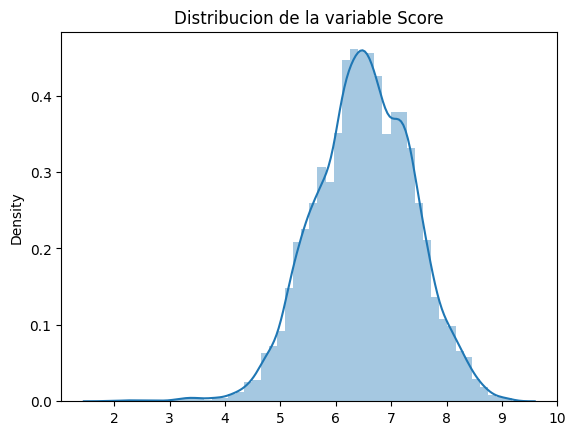

In [102]:
fig = plt.figure()
ax = plt.axes()
ax = sns.distplot(x= anime_sin_Unknown.Score)
plt.title('Distribucion de la variable Score')
plt.show()

3. ANALISIS DE LA VARIABLE GENRES: VARIABLE CATEGORICA

In [112]:
anime.head(2)

,Name,Score,Genres,Episodes,Duration,Rating,Ranked,Popularity,Favorites,Watching,Completed,On-Hold
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,61971,105808,718161,71513
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,1174,4143,208333,1935


Observamos que la columna Genres incluye en cada linea varios Generos, por lo cual utilizarmos tecnicas de NLP para explorar estos datos 

In [63]:
!pip install spacy
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.8 MB 1.4 MB/s eta 0:00:10
     ---------------------------------------- 0.1/12.8 MB 1.2 MB/s eta 0:00:11
      --------------------------------------- 0.2/12.8 MB 1.4 MB/s eta 0:00:10
     - -------------------------------------- 0.4/12.8 MB 1.9 MB/s eta 0:00:07
     - -------------------------------------- 0.5/12.8 MB 2.4 MB/s eta 0:00:06
     - -------------------------------------- 0.6/12.8 MB 2.4 MB/s eta 0:00:06
     -- ------------------------------------- 0.7/12.8 MB 2.5 MB/s eta 0:00:05
     -- ------------------------------------- 0.9/12.8 MB 2.7 MB/s eta 0:00:05
     --- ------------------------------------ 1.1/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.2/12.8 MB 2.9 MB/s eta 0:00:04
     ---- ----------------------------------- 1.4/12.8 MB 2.9 MB/s eta 0:00:04
     ----- ---------------------------------- 1.6/12.8 MB 3

In [64]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [113]:
anime_Genres = anime.Genres

In [114]:
anime_Genres.head()

0      Action, Adventure, Comedy, Drama, Sci-Fi, Space
1                Action, Drama, Mystery, Sci-Fi, Space
2    Action, Sci-Fi, Adventure, Comedy, Drama, Shounen
3    Action, Mystery, Police, Supernatural, Drama, ...
4            Adventure, Fantasy, Shounen, Supernatural
Name: Genres, dtype: object

In [115]:
anime_Genres = pd.DataFrame(anime_Genres)

In [116]:
anime_Genres.columns = ['Generos']

In [117]:
anime_Genres.head()

,Generos
0,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,"Action, Drama, Mystery, Sci-Fi, Space"
2,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,"Action, Mystery, Police, Supernatural, Drama, ..."
4,"Adventure, Fantasy, Shounen, Supernatural"


Definimos una funcion que cuente la frecuencia de aparicion de cada genero:

In [121]:
def count_individual_genres_nlp(df):
    # Divide los géneros en cada fila y convierte la columna resultante en una lista de listas
    genres_list_of_lists = df['Generos'].str.split(', ').tolist()

    # Usa explode para convertir la lista de listas en filas duplicadas
    df_exploded = df.assign(Genero=df['Generos'].str.split(', ')).explode('Genero')

    # Cuenta la frecuencia de cada género
    genres_count = df_exploded['Genero'].value_counts()

    return genres_count

# Llamamos a la función con tu DataFrame
individual_genres_count_nlp = count_individual_genres_nlp(anime_Genres)

# Mostramos la frecuencia de cada género
print(individual_genres_count_nlp)

Genero
Comedy           6029
Action           3888
Fantasy          3285
Adventure        2957
Kids             2665
Drama            2619
Sci-Fi           2583
Music            2244
Shounen          2003
Slice of Life    1914
Romance          1899
School           1642
Supernatural     1479
Hentai           1348
Historical       1144
Mecha            1101
Magic            1081
Seinen            830
Ecchi             767
Mystery           727
Sports            713
Shoujo            688
Parody            660
Super Power       632
Military          576
Dementia          512
Demons            501
Space             495
Horror            462
Martial Arts      425
Harem             399
Game              386
Psychological     345
Police            247
Samurai           202
Vampire           136
Cars              133
Thriller          131
Shounen Ai        100
Josei              97
Shoujo Ai          79
Unknown            63
Yaoi               42
Yuri               32
Name: count, dtype: int64

Graficamos el top 10 de generos que aparecen en los animes 

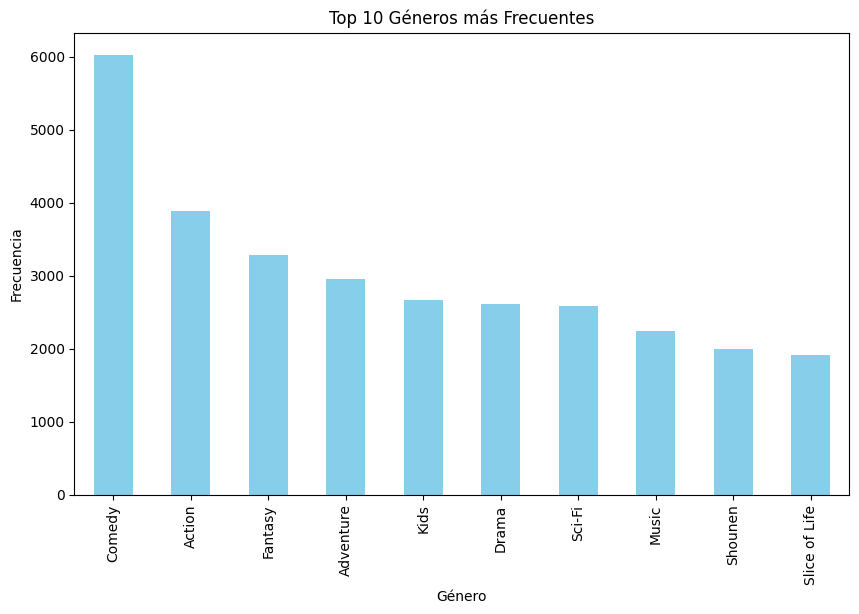

In [122]:
def plot_top_genres(df, top_n=10):
    # Contar la frecuencia de cada género
    genres_count = count_individual_genres_nlp(df)

    # Seleccionar los 10 géneros más frecuentes
    top_genres = genres_count.head(top_n)

    # Graficar
    plt.figure(figsize=(10, 6))
    top_genres.plot(kind='bar', color='skyblue')
    plt.title(f'Top {top_n} Géneros más Frecuentes')
    plt.xlabel('Género')
    plt.ylabel('Frecuencia')
    plt.show()

# Llamar a la función con tu DataFrame
plot_top_genres(anime_Genres, top_n=10)

4. ANALISIS DE LA VARIABLE EPISODES: VARIABLE NUMERICA DISCRETA

In [124]:
anime.head(1)

,Name,Score,Genres,Episodes,Duration,Rating,Ranked,Popularity,Favorites,Watching,Completed,On-Hold
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,61971,105808,718161,71513


In [125]:
anime.Episodes.nunique()

201

In [126]:
anime.Episodes.unique()

array(['26', '1', '52', '145', '24', '74', '220', 'Unknown', '178', '12',
       '22', '69', '25', '4', '94', '5', '3', '13', '23', '43', '6', '50',
       '47', '51', '49', '39', '8', '7', '75', '62', '14', '44', '45',
       '64', '101', '27', '161', '2', '153', '70', '78', '42', '11',
       '167', '150', '366', '9', '16', '38', '48', '10', '76', '40', '20',
       '37', '41', '112', '224', '180', '296', '358', '63', '276', '46',
       '54', '15', '21', '35', '124', '86', '102', '36', '67', '291',
       '110', '29', '55', '201', '142', '109', '34', '136', '32', '73',
       '114', '19', '195', '58', '155', '96', '103', '113', '104', '192',
       '191', '203', '56', '500', '80', '172', '65', '117', '28', '61',
       '30', '148', '128', '100', '17', '243', '92', '105', '79', '31',
       '1787', '53', '33', '130', '18', '97', '193', '115', '170', '66',
       '330', '108', '68', '119', '95', '137', '60', '77', '72', '127',
       '99', '373', '300', '163', '91', '88', '154', '156'

In [127]:
anime.Episodes.describe()

count     17562
unique      201
top           1
freq       8381
Name: Episodes, dtype: object

8.381 animes de 17.562 contienen solo 1 episodio 

In [129]:
#Eliminemos los valores desconocidos para conocer la distribucion de esta variable
mask = anime.Episodes != 'Unknown'
anime_sin_Unknown = anime[mask]

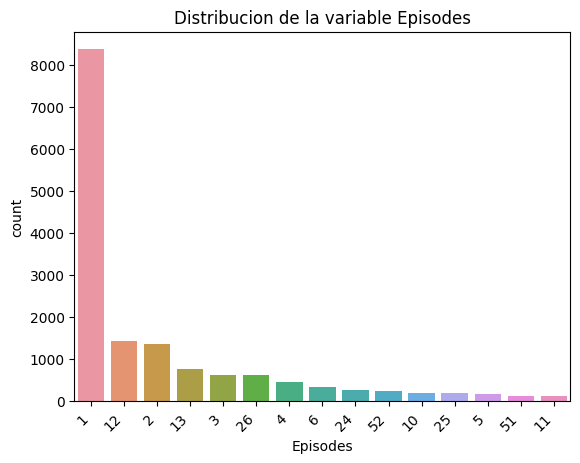

In [132]:
#Veamos como se distribuyen los valores
fig = plt.figure()
ax = plt.axes()
ax= sns.countplot(x='Episodes', data=anime_sin_Unknown, order=anime_sin_Unknown.Episodes.value_counts().index[:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Distribucion de la variable Episodes')
plt.show()

5. ANALISIS DE LA VARIABLE DURATION : VARIABLE NUMERICA DISCRETA

In [133]:
anime.head()

,Name,Score,Genres,Episodes,Duration,Rating,Ranked,Popularity,Favorites,Watching,Completed,On-Hold
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24 min. per ep.,R - 17+ (violence & profanity),28.0,39,61971,105808,718161,71513
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,1 hr. 55 min.,R - 17+ (violence & profanity),159.0,518,1174,4143,208333,1935
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,24 min. per ep.,PG-13 - Teens 13 or older,266.0,201,12944,29113,343492,25465
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,25 min. per ep.,PG-13 - Teens 13 or older,2481.0,1467,587,4300,46165,5121
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,23 min. per ep.,PG - Children,3710.0,4369,18,642,7314,766


In [136]:
anime.Duration.head()

0    24 min. per ep.
1      1 hr. 55 min.
2    24 min. per ep.
3    25 min. per ep.
4    23 min. per ep.
Name: Duration, dtype: object

In [135]:
anime.Duration.dtype

dtype('O')

Convertimos todo a minutos

In [138]:
def convert_to_minutes(duration):
    # Separar las partes de la duración (horas y minutos)
    parts = duration.split()

    total_minutes = 0

    for i in range(len(parts)):
        if 'hr.' in parts[i]:
            total_minutes += int(parts[i - 1]) * 60
        elif 'min.' in parts[i]:
            total_minutes += int(parts[i - 1])

    return total_minutes

# Aplicar la función a la columna 'Duration'
anime['Duration_minutes'] = anime['Duration'].apply(convert_to_minutes)

# Mostrar el DataFrame con la nueva columna 'Duration_minutes'
print(anime[['Duration', 'Duration_minutes']])

              Duration  Duration_minutes
0      24 min. per ep.                24
1        1 hr. 55 min.               115
2      24 min. per ep.                24
3      25 min. per ep.                25
4      23 min. per ep.                23
...                ...               ...
17557          Unknown                 0
17558          Unknown                 0
17559          Unknown                 0
17560          Unknown                 0
17561          Unknown                 0

[17562 rows x 2 columns]


In [139]:
anime['Duration'] = anime['Duration_minutes']

In [140]:
anime.head()

,Name,Score,Genres,Episodes,Duration,Rating,Ranked,Popularity,Favorites,Watching,Completed,On-Hold,Duration_minutes
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24,R - 17+ (violence & profanity),28.0,39,61971,105808,718161,71513,24
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,115,R - 17+ (violence & profanity),159.0,518,1174,4143,208333,1935,115
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,24,PG-13 - Teens 13 or older,266.0,201,12944,29113,343492,25465,24
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,25,PG-13 - Teens 13 or older,2481.0,1467,587,4300,46165,5121,25
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,23,PG - Children,3710.0,4369,18,642,7314,766,23


In [141]:
#Nos quedamos con una sola columna llamada Duration cuyos valores son minutos
anime = anime.drop(columns=['Duration_minutes'])
anime.head()

,Name,Score,Genres,Episodes,Duration,Rating,Ranked,Popularity,Favorites,Watching,Completed,On-Hold
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24,R - 17+ (violence & profanity),28.0,39,61971,105808,718161,71513
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,115,R - 17+ (violence & profanity),159.0,518,1174,4143,208333,1935
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,24,PG-13 - Teens 13 or older,266.0,201,12944,29113,343492,25465
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,25,PG-13 - Teens 13 or older,2481.0,1467,587,4300,46165,5121
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,23,PG - Children,3710.0,4369,18,642,7314,766


In [142]:
anime.Duration.min()

0

In [145]:
#Eliminemos los valores iguales a 0 para conocer la distribucion de esta variable
mask = anime.Duration != 0
anime_sin_Unknown = anime[mask]

In [146]:
anime.Duration.max()

167

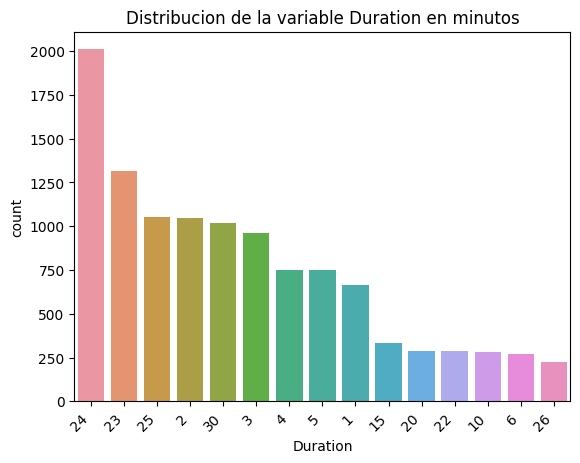

In [149]:
#Veamos como se distribuyen los valores
fig = plt.figure()
ax = plt.axes()
ax= sns.countplot(x='Duration', data=anime_sin_Unknown, order=anime_sin_Unknown.Duration.value_counts().index[:15])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Distribucion de la variable Duration en minutos')
plt.show()

6. ANALISIS DE LA VARIABLE RATING: VARIABLE CATEGORICA   
Recordamos que rating corresponde a la edad apta a partir de la cual se puede ver el anime.

In [151]:
anime.head(5)

,Name,Score,Genres,Episodes,Duration,Rating,Ranked,Popularity,Favorites,Watching,Completed,On-Hold
0,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",26,24,R - 17+ (violence & profanity),28.0,39,61971,105808,718161,71513
1,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",1,115,R - 17+ (violence & profanity),159.0,518,1174,4143,208333,1935
2,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",26,24,PG-13 - Teens 13 or older,266.0,201,12944,29113,343492,25465
3,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",26,25,PG-13 - Teens 13 or older,2481.0,1467,587,4300,46165,5121
4,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",52,23,PG - Children,3710.0,4369,18,642,7314,766


In [152]:
anime.Rating.head()

0    R - 17+ (violence & profanity)
1    R - 17+ (violence & profanity)
2         PG-13 - Teens 13 or older
3         PG-13 - Teens 13 or older
4                     PG - Children
Name: Rating, dtype: object

In [153]:
anime.Rating.nunique()

7

In [154]:
anime.Rating.unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages', 'Rx - Hentai',
       'Unknown'], dtype=object)

In [155]:
#Eliminemos los valores Unknown
mask = anime.Rating != 'Unknown'
anime_sin_Unknown = anime[mask]

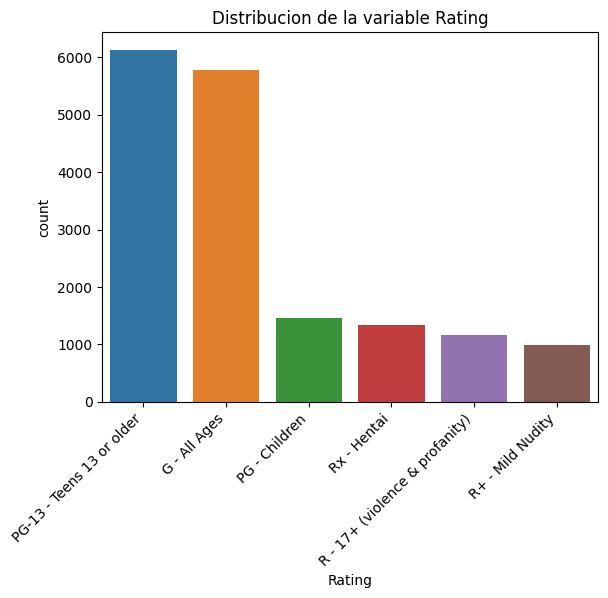

In [157]:
#veamos la distribucion de esta variable 
fig = plt.figure()
ax = plt.axes()
ax= sns.countplot(x='Rating', data=anime_sin_Unknown, order=anime_sin_Unknown.Rating.value_counts().index)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.title('Distribucion de la variable Rating')
plt.show()

# Exploramos el quinto set de datos: anime_with_sinopsis  
Este dataset contiene informacion adicional al resto, relativa a la sinopsis de cada anime 


In [186]:
anime_with_sinopsis = pd.read_csv(r"C:\Users\ferbi\OneDrive\Desktop\Fer\DATASCIENCE\Cuarto TP Sistemas de recomendacion\archive (10)\anime_with_synopsis.csv")

In [187]:
anime_with_sinopsis.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever..."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of ..."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0..."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",ches are individuals with special powers like ...
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...


ANALISIS EXPLORATORIO DE DATOS

In [188]:
print(f'Numero de filas: {anime_with_sinopsis.shape[0]}')
print(f'Numero de columnas: {anime_with_sinopsis.shape[1]}')

Numero de filas: 16214
Numero de columnas: 5


In [189]:
anime_with_sinopsis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16214 entries, 0 to 16213
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MAL_ID     16214 non-null  int64 
 1   Name       16214 non-null  object
 2   Score      16214 non-null  object
 3   Genres     16214 non-null  object
 4   sypnopsis  16206 non-null  object
dtypes: int64(1), object(4)
memory usage: 633.5+ KB


In [190]:
anime_with_sinopsis.isna().sum()

MAL_ID       0
Name         0
Score        0
Genres       0
sypnopsis    8
dtype: int64

In [191]:
#Porcenataje de valores nulos
anime_with_sinopsis.isna().sum() / len(anime_with_sinopsis)*100

MAL_ID       0.00000
Name         0.00000
Score        0.00000
Genres       0.00000
sypnopsis    0.04934
dtype: float64

In [192]:
#Dado el bajo porcentaje de datos nulos, decidimos eliminarlos 
anime_with_sinopsis= anime_with_sinopsis.dropna(axis=0) 

In [193]:
#Verificamos el porcenataje de valores nulos
anime_with_sinopsis.isna().sum() / len(anime_with_sinopsis)*100

MAL_ID       0.0
Name         0.0
Score        0.0
Genres       0.0
sypnopsis    0.0
dtype: float64

Debido a que ya exploramos el resto de las columnas, trabajaremos la columna synopsis mediante tecnicas de NLP

In [197]:
df = anime_with_sinopsis[['Name', 'sypnopsis']]
df.head()

,Name,sypnopsis
0,Cowboy Bebop,"In the year 2071, humanity has colonized sever..."
1,Cowboy Bebop: Tengoku no Tobira,"other day, another bounty—such is the life of ..."
2,Trigun,"Vash the Stampede is the man with a $$60,000,0..."
3,Witch Hunter Robin,ches are individuals with special powers like ...
4,Bouken Ou Beet,It is the dark century and the people are suff...


In [198]:
df.shape #Nuestro conjunto de datos contiene 16206 entradas

(16206, 2)

In [199]:
pd.options.display.max_colwidth = 10000 #La siguiente celda, sirve para que cuando imprimamos un dataframe, pandas nos muestre el texto entero y no lo corte con "..."

In [200]:
df.head()

,Name,sypnopsis
0,Cowboy Bebop,"In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after."
1,Cowboy Bebop: Tengoku no Tobira,"other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized."
2,Trigun,"Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs. With his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash's agonizing past will be unraveled and his morality and principles pushed to the breaking point."
3,Witch Hunter Robin,"ches are individuals with special powers like ESP, telekinesis, mind control, etc. Robin, a 15-year-old craft user, arrives from Italy to Japan to work for an organization named STN Japan Division (STN-J) as a replacement for one of STN-J's witch hunters who was recently killed. Unlike other divisions of STN, STN-J tries to capture the witches alive in order to learn why and how they became witches in the first place. (Source: ANN)"
4,Bouken Ou Beet,"It is the dark century and the people are suffering under the rule of the devil, Vandel, who is able to manipulate monsters. The Vandel Busters are a group of people who hunt these devils, and among them, the Zenon Squad is known to be the strongest busters on the continent. A young boy, Beet, dreams of joining the Zenon Squad. However, one day, as a result of Beet's fault, the Zenon squad was defeated by the devil, Beltose. The five dying busters sacrificed their life power into their five weapons, Saiga.

ELIMINAMOS STOP WORDS, SIGNOS DE PUNTUACION, COVERTIMOS TODAS LAS PALABRAS A MINUSCULAS Y LAS LLEVAMOS A SU RAIZ (LEMMA)

In [206]:
#Limpieza de synopsis
def clean_synopsis(column):
    clean_column = []
    for text in column:
        clean_text = []
        doc = nlp(text)
        for token in doc:
            if not token.is_stop and not token.is_punct:
                clean_text.append(token.lemma_.lower())
        clean_column.append(" ".join(clean_text))
    return clean_column

In [207]:
#Le pasamos los datos a la funcion
df['Cleaned_sypnopsis'] = clean_synopsis(df['sypnopsis'])

C:\Users\ferbi\AppData\Local\Temp\ipykernel_14308\538548159.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cleaned_sypnopsis'] = clean_synopsis(df['sypnopsis'])


In [208]:
df.head()

,Name,sypnopsis,Cleaned_sypnopsis
0,Cowboy Bebop,"In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after.",year 2071 humanity colonize planet moon solar system leave uninhabitable surface planet earth inter solar system police attempt peace galaxy aid outlaw bounty hunter refer cowboys ragtag team aboard spaceship bebop individual mellow carefree spike spiegel balance boisterous pragmatic partner jet black pair make living chasing bounty collect reward throw course addition new member meet travel ein genetically engineer highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embark thrilling adventure unravel member dark mysterious past little little balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvise music name
1,Cowboy Bebop: Tengoku no Tobira,"other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized.",day bounty life unlucky crew bebop routine interrupt faye chase fairly worthless target mars witness oil tanker suddenly explode cause mass hysteria casualty mount strange disease spread smoke blast whopping million woolong price place head suppose perpetrator life stake solution money problem sight bebop crew spring action spike jet faye edward follow closely ein split pursue different lead alba city individual investigation discover cover scheme involve pharmaceutical company reveal plot reach ragtag team bounty hunter realize
2,Trigun,"Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs. With his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly

# TF - IDF
El TF-IDF Vectorizer (Term Frequency-Inverse Document Frequency Vectorizer) es una técnica comúnmente utilizada en procesamiento de lenguaje natural (NLP) y recuperación de información para representar documentos de texto como vectores numéricos. 

El TF-IDF Vectorizer transforma un conjunto de documentos de texto en una matriz numérica donde cada fila representa un documento y cada columna representa un término (o palabra). Los valores en la matriz son los valores TF-IDF de cada término en cada documento. Esta representación numérica permite realizar análisis de texto y algoritmos de aprendizaje automático en el texto de manera más eficaz.

En resumen, el TF-IDF Vectorizer es una técnica que pondera las palabras en función de su frecuencia en un documento y su importancia relativa en un conjunto de documentos, lo que ayuda a identificar términos clave y características importantes en el texto.

In [209]:
#Importamos TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

In [210]:
# Creamos un objeto TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['Cleaned_sypnopsis'])
tfidf_matrix

<16206x39286 sparse matrix of type '<class 'numpy.float64'>'
	with 477486 stored elements in Compressed Sparse Row format>

In [211]:
# Obtenemos las palabras clave o tópicos más importantes
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = tfidf_matrix.sum(axis=0)

In [212]:
feature_names

array(['00', '000', '000th', ..., '黄色いしあわせ', '박사', '카프'], dtype=object)

In [213]:
# Ordenamos las palabras clave por importancia (valores TF-IDF)
top_keywords = [feature_names[i] for i in tfidf_scores.argsort()[0][::-1][:10]]

print("Palabras clave más importantes:")
print(top_keywords)

Palabras clave más importantes:
[array([['hajikeru', 'mannaka', 'ttara', ..., 'source', 'add', 'synopsis']],
      dtype=object)]


Visualizamos las 50 palabras mas importantes segun TF-IDF

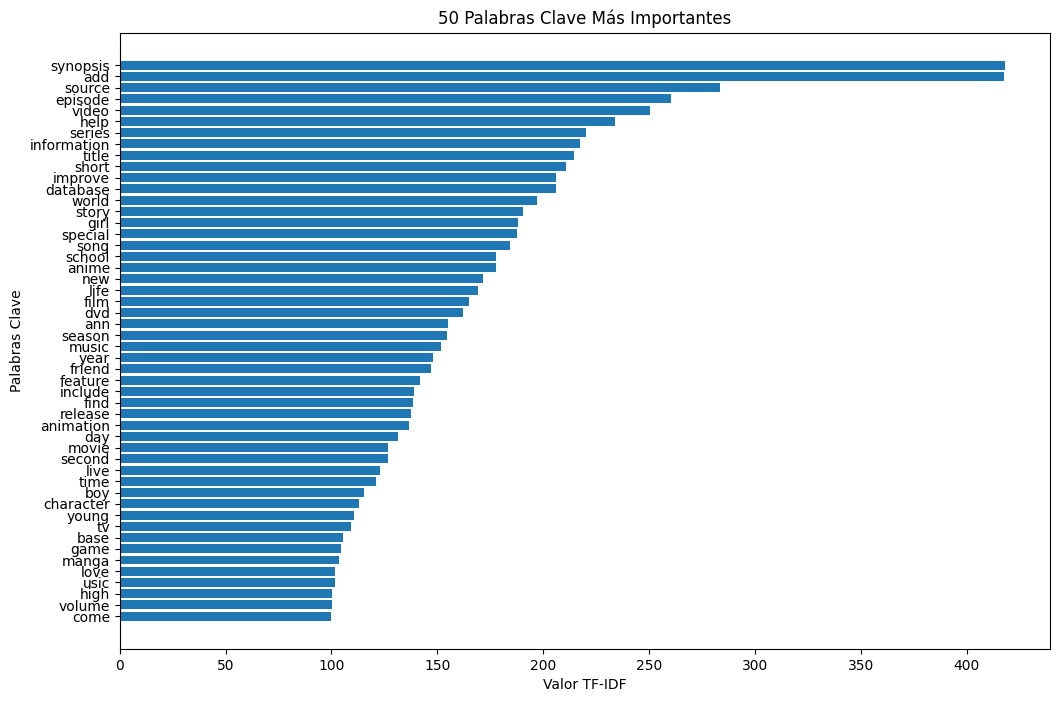

In [214]:
# Obtenemos las palabras clave y sus valores TF-IDF
feature_names = tfidf_vectorizer.get_feature_names_out()
tfidf_scores = np.array(tfidf_matrix.sum(axis=0)).flatten()

# Creamos un diccionario que almacene las palabras clave y sus valores TF-IDF
keywords_dict = {feature_names[i]: tfidf_scores[i] for i in range(len(feature_names))}

# Obtenemos las 50 palabras clave más importantes
top_keywords = sorted(keywords_dict.items(), key=lambda x: x[1], reverse=True)[:50]

# Extraemos las palabras y los valores TF-IDF
top_words, top_scores = zip(*top_keywords)

# Creamos un gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_words)), top_scores, align='center')
plt.yticks(range(len(top_words)), top_words)
plt.xlabel('Valor TF-IDF')
plt.ylabel('Palabras Clave')
plt.title('50 Palabras Clave Más Importantes')
plt.gca().invert_yaxis()  # Invertimos el eje y para mostrar las palabras más importantes arriba

# Mostramos el gráfico
plt.show()

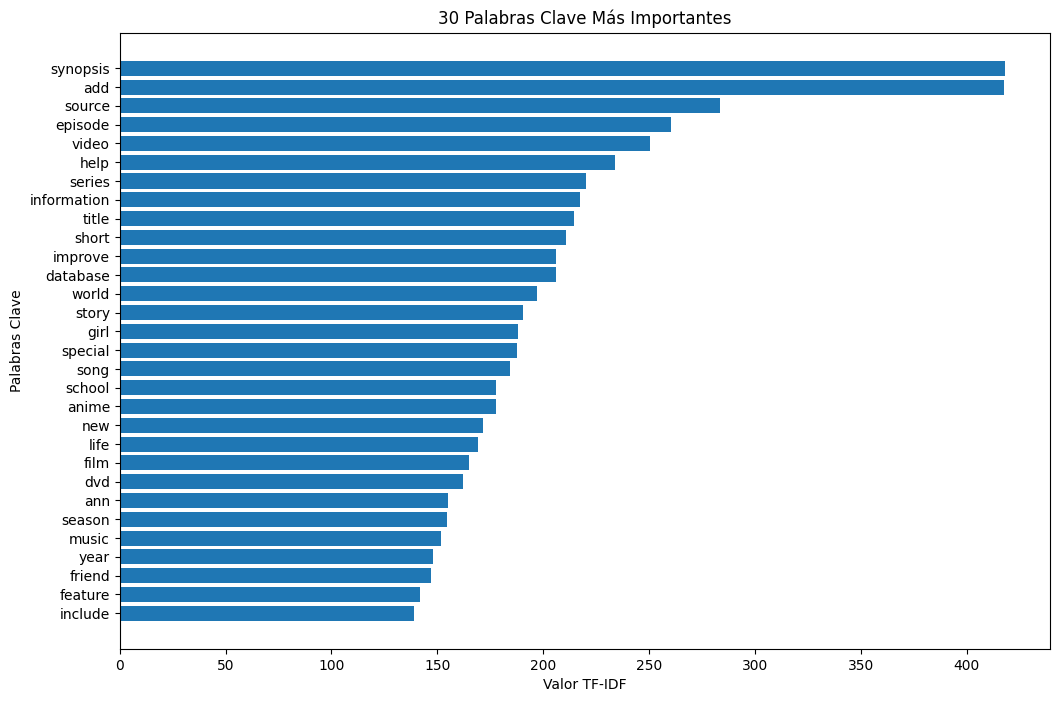

In [215]:
# Obtenemos las 30 palabras clave más importantes
top_keywords = sorted(keywords_dict.items(), key=lambda x: x[1], reverse=True)[:30]

# Extraemos las palabras y los valores TF-IDF
top_words, top_scores = zip(*top_keywords)

# Creamos un gráfico de barras
plt.figure(figsize=(12, 8))
plt.barh(range(len(top_words)), top_scores, align='center')
plt.yticks(range(len(top_words)), top_words)
plt.xlabel('Valor TF-IDF')
plt.ylabel('Palabras Clave')
plt.title('30 Palabras Clave Más Importantes')
plt.gca().invert_yaxis()  # Invertimos el eje y para mostrar las palabras más importantes arriba

# Mostramos el gráfico
plt.show()

Observamos que synopsis, add, source, episode, video, help, series son algunas de las tematicas que mas se repiten en el cuerpo del dataset


Aplicamos WordCloud para visualizar las palabras que mas aparecen en el corpus

In [216]:
#Instalamos la libreria necesaria 
!pip install wordcloud

In [217]:
from wordcloud import WordCloud

In [218]:
#Le damos formato a la WordCloud
word_cloud = WordCloud(collocations = False,
                       background_color = 'white',
                       width = 800, height = 800,
                       stopwords = nlp.Defaults.stop_words, 
                       ).generate(str(df["Cleaned_sypnopsis"].values))

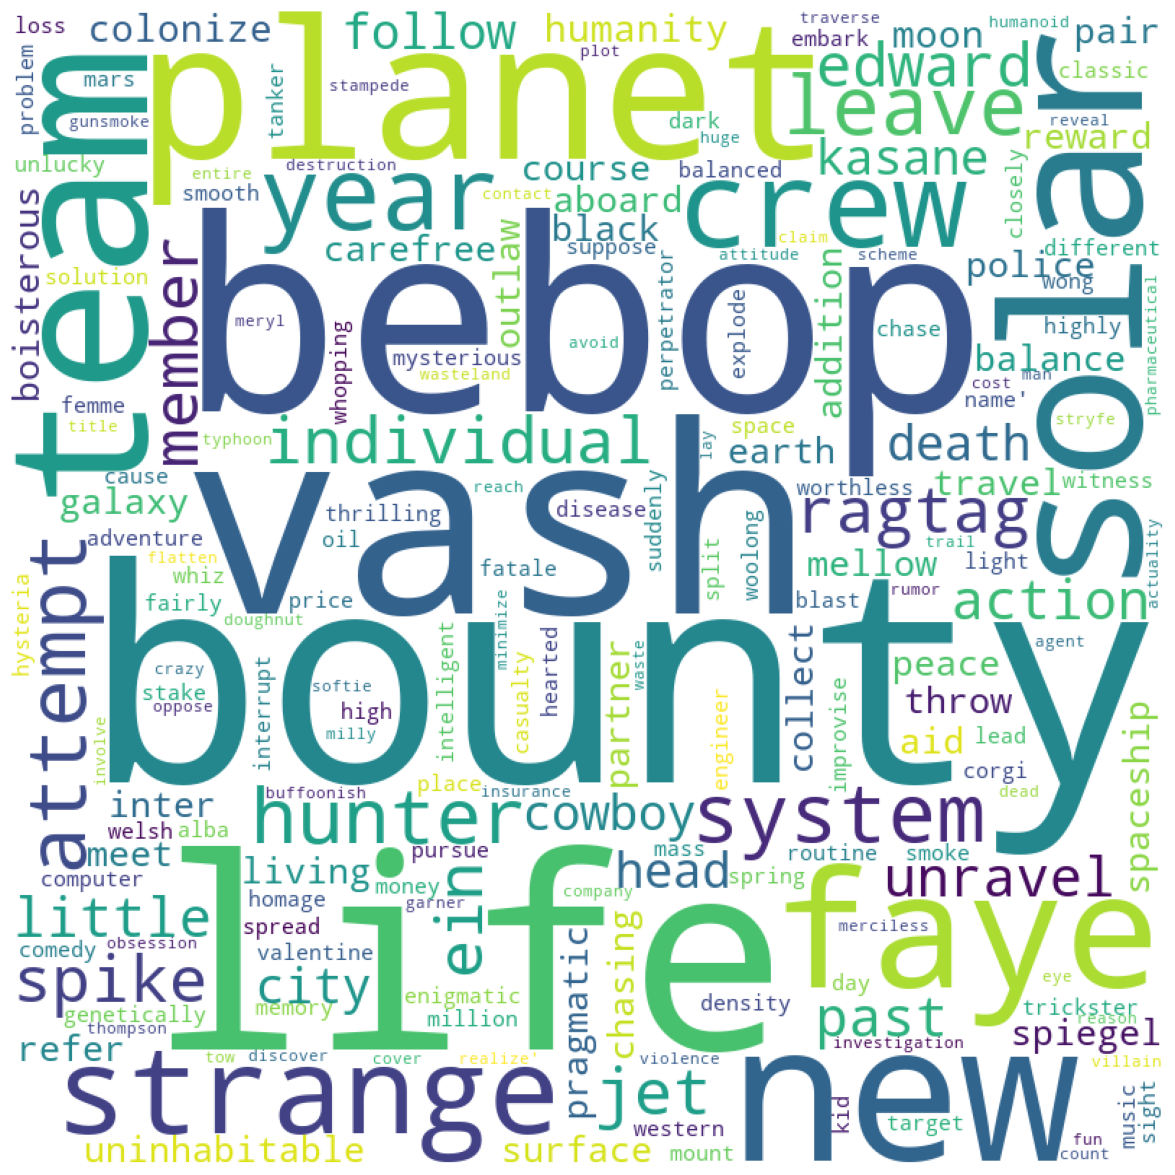

In [219]:
plt.figure(figsize=(15,15))
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

Vemos que las palabras que mas aparecen son: bounty(recompensa), bepop(es un estilo de musica), vash y faye (podrias ser nombres propios), strange, team, planet, solar, new

OBTENEMOS EL SENTIMIENTO DE CADA SYNOPSIS

In [220]:
#Instalamos la libreria
!pip install textblob

In [221]:
#Importamos el modelo
from textblob import TextBlob

Definimos una función get_sentiment que dado un texto, nos retorne:
- la palabra "POS" si polarity > 0.1
- la palabra "NEU" si polarity ≥ -0.1 & polarity ≤ 0.1
- la palabra "NEG" si polarity < -0.1

In [222]:
def get_sentiment(text):
  sent = TextBlob(text).sentiment.polarity

  if sent > 0.1:
    return "POS"
  
  if sent >= -0.1 and sent <= 0.1:
    return "NEU"

  if sent < 0.1:
    return "NEG"

In [223]:
#La aplicamos a nuestro dataset 
df["SENTIMENT"] = df["Cleaned_sypnopsis"].apply(get_sentiment)

C:\Users\ferbi\AppData\Local\Temp\ipykernel_14308\3468855764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["SENTIMENT"] = df["Cleaned_sypnopsis"].apply(get_sentiment)


In [224]:
df.head()

,Name,sypnopsis,Cleaned_sypnopsis,SENTIMENT
0,Cowboy Bebop,"In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after.",year 2071 humanity colonize planet moon solar system leave uninhabitable surface planet earth inter solar system police attempt peace galaxy aid outlaw bounty hunter refer cowboys ragtag team aboard spaceship bebop individual mellow carefree spike spiegel balance boisterous pragmatic partner jet black pair make living chasing bounty collect reward throw course addition new member meet travel ein genetically engineer highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embark thrilling adventure unravel member dark mysterious past little little balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvise music name,NEU
1,Cowboy Bebop: Tengoku no Tobira,"other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized.",day bounty life unlucky crew bebop routine interrupt faye chase fairly worthless target mars witness oil tanker suddenly explode cause mass hysteria casualty mount strange disease spread smoke blast whopping million woolong price place head suppose perpetrator life stake solution money problem sight bebop crew spring action spike jet faye edward follow closely ein split pursue different lead alba city individual investigation discover cover scheme involve pharmaceutical company reveal plot reach ragtag team bounty hunter realize,NEG
2,Trigun,"Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs. With his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Mery

In [225]:
#Realizamos un conteo de categorias
conteo_categorias = df['SENTIMENT'].value_counts()
conteo_categorias

SENTIMENT
NEU    9217
POS    5040
NEG    1949
Name: count, dtype: int64

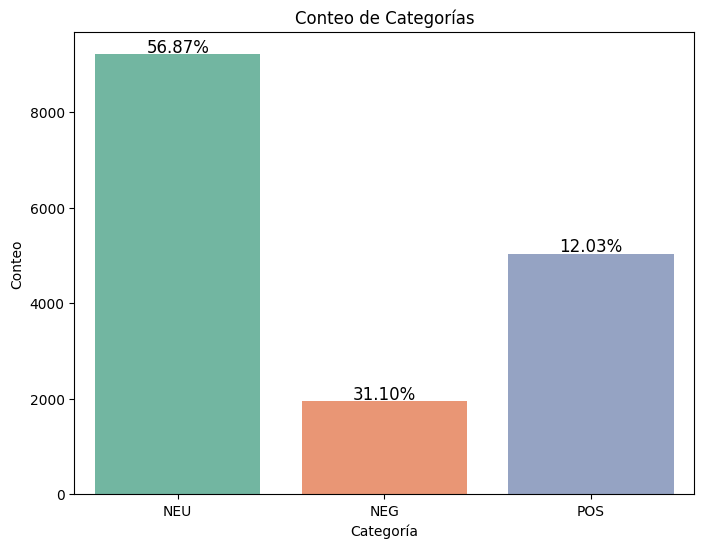

In [226]:
# Calculamos los porcentajes
porcentajes = (conteo_categorias / conteo_categorias.sum()) * 100

# Creamos un gráfico de barras utilizando Seaborn
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x='SENTIMENT', palette='Set2')
plt.title('Conteo de Categorías')
plt.xlabel('Categoría')
plt.ylabel('Conteo')

# Agregamos los porcentajes encima de las barras
for p, label in zip(ax.patches, porcentajes):
    ax.annotate(f'{label:.2f}%', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

plt.show()

In [227]:
#Definimos una funcion que dado un texto, retorne una lista de todos sus adjetivos
def get_adjectives(text):
    doc = nlp(text)
    adjectives = []
    for token in doc:
        if token.pos_ == "ADJ":
            adjectives.append(token.text)
    return adjectives

In [228]:
#Ahora aplicamos la funcion sobre nuestro dataset
df["ADJECTIVES"] = df["Cleaned_sypnopsis"].apply(get_adjectives)

In [229]:
df.head()

,Name,sypnopsis,Cleaned_sypnopsis,SENTIMENT,ADJECTIVES
0,Cowboy Bebop,"In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after.",year 2071 humanity colonize planet moon solar system leave uninhabitable surface planet earth inter solar system police attempt peace galaxy aid outlaw bounty hunter refer cowboys ragtag team aboard spaceship bebop individual mellow carefree spike spiegel balance boisterous pragmatic partner jet black pair make living chasing bounty collect reward throw course addition new member meet travel ein genetically engineer highly intelligent welsh corgi femme fatale faye valentine enigmatic trickster memory loss strange computer whiz kid edward wong crew embark thrilling adventure unravel member dark mysterious past little little balanced high density action light hearted comedy cowboy bebop space western classic homage smooth improvise music name,NEU,"[solar, uninhabitable, solar, individual, pragmatic, black, new, intelligent, enigmatic, strange, mysterious, past, little, little, balanced, high, light, hearted, western, classic, smooth]"
1,Cowboy Bebop: Tengoku no Tobira,"other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized.",day bounty life unlucky crew bebop routine interrupt faye chase fairly worthless target mars witness oil tanker suddenly explode cause mass hysteria casualty mount strange disease spread smoke blast whopping million woolong price place head suppose perpetrator life stake solution money problem sight bebop crew spring action spike jet faye edward follow closely ein split pursue different lead alba city individual investigation discover cover scheme involve pharmaceutical company reveal plot reach ragtag team bounty hunter realize,NEG,"[unlucky, interrupt, worthless, mass, strange, woolong, spike, different]"
2,Trigun,"Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. 

Cuales son los 10 adjetivos que mas aparecen en synopsys positivas? 

In [230]:
adj_sentiments = df.explode("ADJECTIVES").groupby(["ADJECTIVES", "SENTIMENT"], as_index=False).agg({"Cleaned_sypnopsis": "count"})

In [231]:
adj_sentiments[adj_sentiments.SENTIMENT == "POS"].sort_values(by="Cleaned_sypnopsis", ascending=False).head(10)

,ADJECTIVES,SENTIMENT,Cleaned_sypnopsis
5908,new,POS,1092
8301,special,POS,832
3909,high,POS,629
3561,good,POS,531
10264,young,POS,520
6155,old,POS,457
5033,live,POS,420
3616,great,POS,420
5748,mysterious,POS,378
6265,original,POS,376


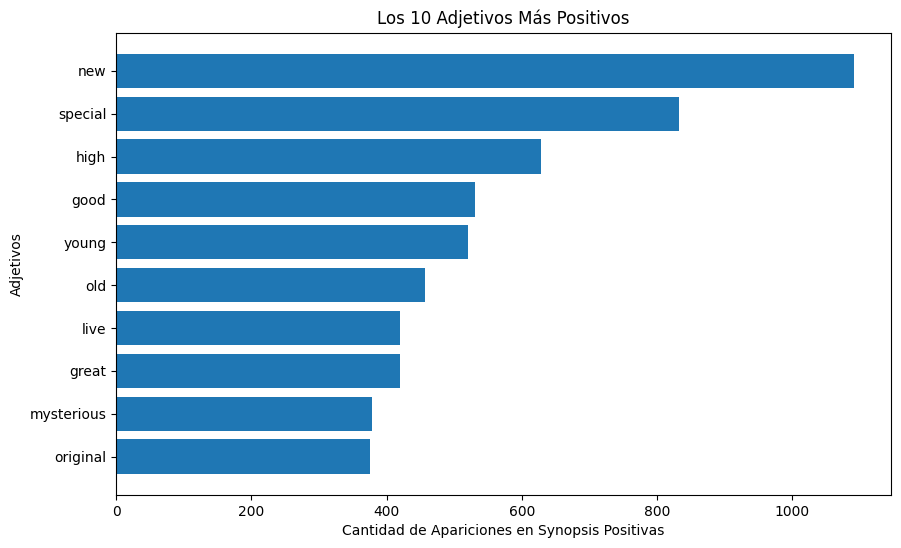

In [233]:
#Lo vemos en un grafico
# Filtramos los 10 adjetivos más positivos
top_10_pos_adj = adj_sentiments[adj_sentiments.SENTIMENT == "POS"].sort_values(by="Cleaned_sypnopsis", ascending=False).head(10)

# Creamos un gráfico de barras para los sustantivos más positivos
plt.figure(figsize=(10, 6))
plt.barh(top_10_pos_adj["ADJECTIVES"], top_10_pos_adj["Cleaned_sypnopsis"])
plt.xlabel('Cantidad de Apariciones en Synopsis Positivas')
plt.ylabel('Adjetivos')
plt.title('Los 10 Adjetivos Más Positivos')
plt.gca().invert_yaxis()  # Invierte el eje Y para mostrar el sustantivo más negativo en la parte superior

plt.show()

Cuales son los 10 adjetivos que mas aparecen en Synopsis neutras? 

In [234]:
adj_sentiments[adj_sentiments.SENTIMENT == "NEU"].sort_values(by="Cleaned_sypnopsis", ascending=False).head(10)


,ADJECTIVES,SENTIMENT,Cleaned_sypnopsis
5907,new,NEU,1208
7983,short,NEU,894
10263,young,NEU,696
5747,mysterious,NEU,678
6154,old,NEU,657
3908,high,NEU,635
4025,human,NEU,569
7762,second,NEU,509
5032,live,NEU,502
9795,usic,NEU,419


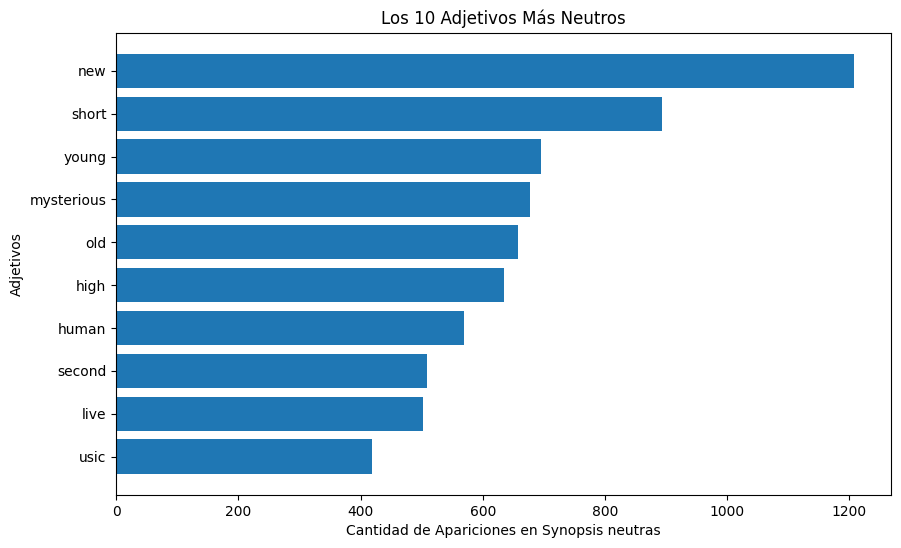

In [235]:
#Lo vemos en un grafico
# Filtramos los 10 adjetivos más negativos
top_10_neg_adj = adj_sentiments[adj_sentiments.SENTIMENT == "NEU"].sort_values(by="Cleaned_sypnopsis", ascending=False).head(10)

# Creamos un gráfico de barras para los sustantivos más negativos
plt.figure(figsize=(10, 6))
plt.barh(top_10_neg_adj["ADJECTIVES"], top_10_neg_adj["Cleaned_sypnopsis"])
plt.xlabel('Cantidad de Apariciones en Synopsis neutras')
plt.ylabel('Adjetivos')
plt.title('Los 10 Adjetivos Más Neutros')
plt.gca().invert_yaxis()  # Invierte el eje Y para mostrar el sustantivo más negativo en la parte superior

plt.show()

Cuales son los 10 adjetivos que mas aparecen en Synopsis negativas? 

In [236]:
adj_sentiments[adj_sentiments.SENTIMENT == "NEG"].sort_values(by="Cleaned_sypnopsis", ascending=False).head(10)

,ADJECTIVES,SENTIMENT,Cleaned_sypnopsis
2775,evil,NEG,261
5906,new,NEG,173
7982,short,NEG,145
7766,secret,NEG,135
5028,little,NEG,124
5746,mysterious,NEG,124
4024,human,NEG,117
10262,young,NEG,116
6153,old,NEG,109
822,bad,NEG,107


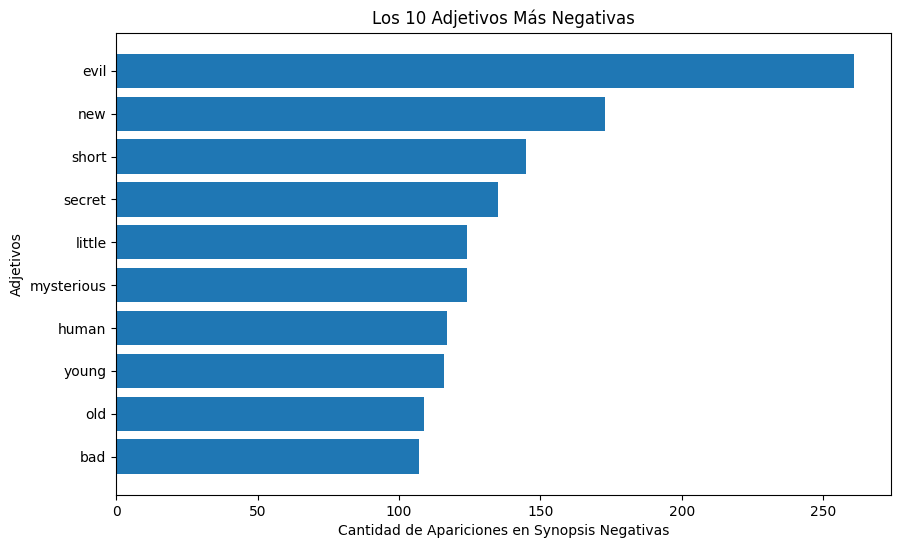

In [237]:
#Lo vemos en un grafico
# Filtramos los 10 adjetivos más negativos
top_10_neg_adj = adj_sentiments[adj_sentiments.SENTIMENT == "NEG"].sort_values(by="Cleaned_sypnopsis", ascending=False).head(10)

# Creamos un gráfico de barras para los sustantivos más negativos
plt.figure(figsize=(10, 6))
plt.barh(top_10_neg_adj["ADJECTIVES"], top_10_neg_adj["Cleaned_sypnopsis"])
plt.xlabel('Cantidad de Apariciones en Synopsis Negativas')
plt.ylabel('Adjetivos')
plt.title('Los 10 Adjetivos Más Negativas')
plt.gca().invert_yaxis()  # Invierte el eje Y para mostrar el sustantivo más negativo en la parte superior

plt.show()

Obtenemos las entidades por synopsis:

Named entity recognition (NER) es una técnica de NLP que automáticamente identifica entidades en un texto y las clasifica en alguna categoría predefinida.

 Una entidad puede ser:
- Nombres de personas
- Organizaciones
- Ubicaciones
- Fechas
- Cantidades
- Valores monetarios
- Porcentajes
- Y más..  
Para este tipo de analisis consideramos mejor utilizar el dataset original, es decir sin la eliminacion de stop words, signos de puntuacion y lematizacion.

In [238]:
df_original = pd.read_csv(r"C:\Users\ferbi\OneDrive\Desktop\Fer\DATASCIENCE\Cuarto TP Sistemas de recomendacion\archive (10)\anime_with_synopsis.csv")

In [239]:
df_original.head()

,MAL_ID,Name,Score,Genres,sypnopsis
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after."
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized."
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs. With his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash's agonizing past will be unraveled and his morality and principles pushed to the breaking point."
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic","ches are individuals with special powers like ESP, telekinesis, mind control, etc. Robin, a 15-year-old craft user, arrives from Italy to Japan to work for an organization named STN Japan Division (STN-J) as a replacement for one of STN-J's witch hunters who was recently killed. Unlike other divisions of STN, STN-J tries to capture the witches alive in order to learn why and how they became witches in the first place. (Source: ANN)"
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural","It is the dark century and the people are suffering under the rule of the devil, Vandel, who is able to manipulate monsters. The Vandel Busters are a group of people who hunt these devils, and among them, the Zenon S

In [240]:
#Definimos una funcion que recibiendo un texto, retorne un listado de entidades
def get_entities(text:str):
  doc=nlp(text)
  ents = []
  if doc.ents: 
    for ent in doc.ents:
      ents.append(ent.text)
      
  return ents

In [241]:
#Aplicamos esta funcion a nuestro dataset
df_original["NER"] = df_original["sypnopsis"].astype(str).apply(get_entities)

In [242]:
df_original.head()

,MAL_ID,Name,Score,Genres,sypnopsis,NER
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized several of the planets and moons of the solar system leaving the now uninhabitable surface of planet Earth behind. The Inter Solar System Police attempts to keep peace in the galaxy, aided in part by outlaw bounty hunters, referred to as ""Cowboys."" The ragtag team aboard the spaceship Bebop are two such individuals. Mellow and carefree Spike Spiegel is balanced by his boisterous, pragmatic partner Jet Black as the pair makes a living chasing bounties and collecting rewards. Thrown off course by the addition of new members that they meet in their travels—Ein, a genetically engineered, highly intelligent Welsh Corgi; femme fatale Faye Valentine, an enigmatic trickster with memory loss; and the strange computer whiz kid Edward Wong—the crew embarks on thrilling adventures that unravel each member's dark and mysterious past little by little. Well-balanced with high density action and light-hearted comedy, Cowboy Bebop is a space Western classic and an homage to the smooth and improvised music it is named after.","[the year 2071, Earth, The Inter Solar System, Cowboys, Bebop, two, Spike Spiegel, Jet Black, Ein, Welsh Corgi, Faye Valentine, Edward Wong, Cowboy Bebop, Western]"
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space","other day, another bounty—such is the life of the often unlucky crew of the Bebop. However, this routine is interrupted when Faye, who is chasing a fairly worthless target on Mars, witnesses an oil tanker suddenly explode, causing mass hysteria. As casualties mount due to a strange disease spreading through the smoke from the blast, a whopping three hundred million woolong price is placed on the head of the supposed perpetrator. With lives at stake and a solution to their money problems in sight, the Bebop crew springs into action. Spike, Jet, Faye, and Edward, followed closely by Ein, split up to pursue different leads across Alba City. Through their individual investigations, they discover a cover-up scheme involving a pharmaceutical company, revealing a plot that reaches much further than the ragtag team of bounty hunters could have realized.","[Bebop, Faye, Mars, three hundred million, Bebop, Jet, Faye, Edward, Ein, Alba City]"
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,000,000 bounty on his head. The reason: he's a merciless villain who lays waste to all those that oppose him and flattens entire cities for fun, garnering him the title ""The Humanoid Typhoon."" He leaves a trail of death and destruction wherever he goes, and anyone can count themselves dead if they so much as make eye contact—or so the rumors say. In actuality, Vash is a huge softie who claims to have never taken a life and avoids violence at all costs. With his crazy doughnut obsession and buffoonish attitude in tow, Vash traverses the wasteland of the planet Gunsmoke, all the while followed by two insurance agents, Meryl Stryfe and Milly Thompson, who attempt to minimize his impact on the public. But soon, their misadventures evolve into life-or-death situations as a group of legendary assassins are summoned to bring about suffering to the trio. Vash's agonizing past will be unraveled and his morality and principles pushed to the breaking point.","[Stampede, $$60,000,000,000, The Humanoid Typhoon, Vash, Vash, Gunsmoke, two, Meryl Stryfe, Milly Thompson, Vash]"
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, Magic","ches are individuals with special powers like ESP, telekinesis, mind control, etc. Robin, a 15-year-old craft user, arrives from Italy to Japan to work for an organization named STN Japan Division (STN-J) as a replacement for one of STN-J's witch hunters who was recently killed. Unlike other divisions of STN, STN-J tries to capture the witches ali

In [243]:
#Obtenemos las NER mas frecuentes 
from collections import Counter

# Paso 1: Concatenamos todas las listas de entidades en una única lista
all_entities = [entity for entities in df_original["NER"] for entity in entities]

# Paso 2: Contamos la frecuencia de cada entidad
entity_counter = Counter(all_entities)

# Paso 3: Ordenamos los resultados por frecuencia (las entidades más mencionadas primero)
most_common_entities = entity_counter.most_common()

# Imprimimos las 10 entidades más mencionadas
for entity, count in most_common_entities[:10]:
    print(f"{entity}: {count} veces")

two: 1398 veces
first: 1139 veces
Earth: 920 veces
Japan: 910 veces
one: 907 veces
Japanese: 800 veces
three: 655 veces
Tokyo: 478 veces
One day: 426 veces
Wikipedia: 349 veces


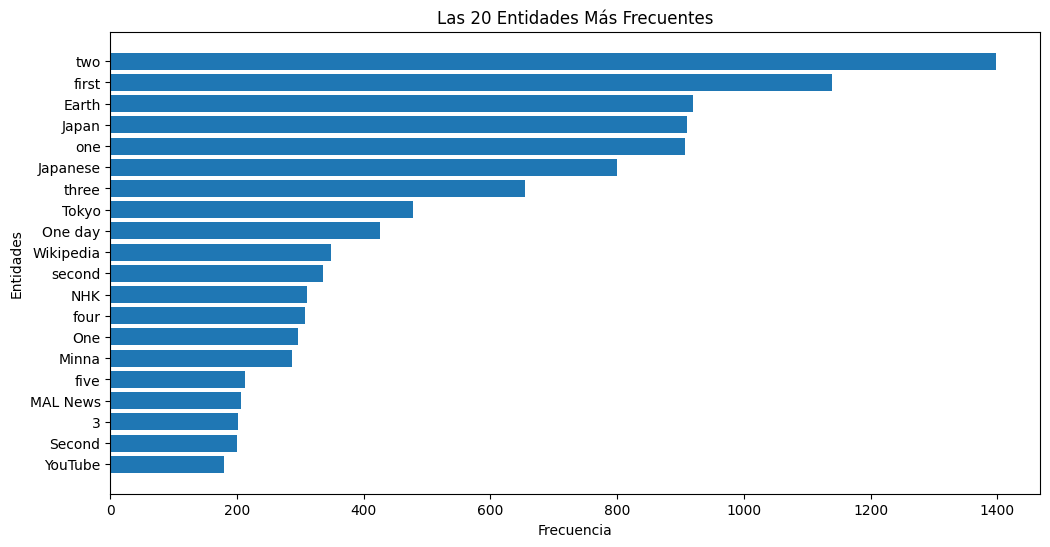

In [244]:
#Visualizamos mediante un grafico
# Obtenemos las 20 entidades más frecuentes
top_20_entities = most_common_entities[:20]

# Extraemos las entidades y sus frecuencias en listas separadas
entities, frequencies = zip(*top_20_entities)

# Creamos un gráfico de barras
plt.figure(figsize=(12, 6))
plt.barh(entities, frequencies)
plt.xlabel('Frecuencia')
plt.ylabel('Entidades')
plt.title('Las 20 Entidades Más Frecuentes')
plt.gca().invert_yaxis()  # Invierte el eje Y para mostrar la entidad más frecuente en la parte superior

plt.show()